<a href="https://colab.research.google.com/github/LeeYeonGeol/ML_DL_Practice/blob/main/KNN_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-최근접 이웃 분류

In [1]:
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')


plt.rc('font', family='NanumBarunGothic') 



In [2]:
from sklearn.model_selection import train_test_split
x, y = mglearn.datasets.make_forge()

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [3]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [4]:
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [5]:
print("테스트 세트 예측:", clf.predict(x_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [6]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(x_test,y_test)))

테스트 세트 정확도: 0.86


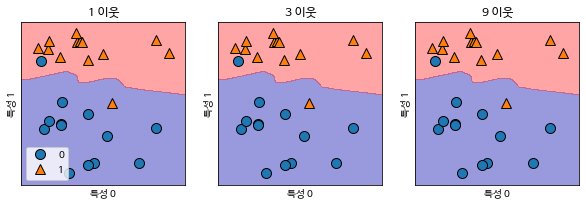

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
  clt = KNeighborsClassifier(n_neighbors=n_neighbors).fit(x, y)
  mglearn.plots.plot_2d_separator(clf, x, fill=True, eps=0.5, ax=ax, alpha=.4)
  mglearn.discrete_scatter(x[:, 0], x[:, 1], y, ax=ax)
  ax.set_title("{} 이웃".format(n_neighbors))
  ax.set_xlabel("특성 0")
  ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

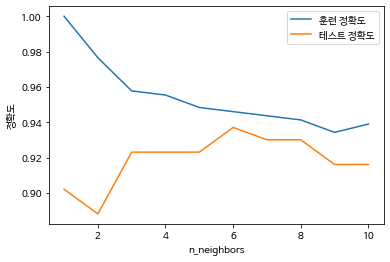

In [8]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(x_train, y_train)
  # 훈련 세트 정확도 저장
  training_accuracy.append(clf.score(x_train, y_train))
  # 일반화 정확도 저장
  test_accuracy.append(clf.score(x_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

# k-최근접 이웃 회귀

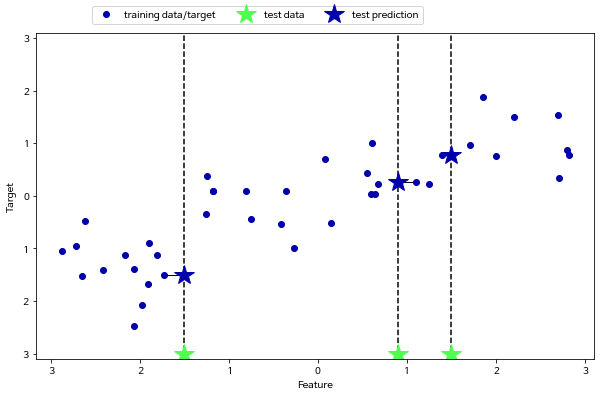

In [9]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

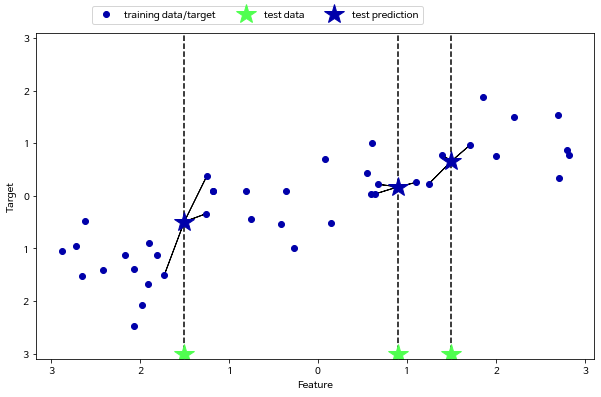

In [10]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [11]:
from sklearn.neighbors import KNeighborsRegressor

x, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눈다.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만든다.
reg = KNeighborsRegressor(n_neighbors=3)

# 훈련 데이터와 타깃을 사용하여 모델을 학습시킨다.
reg.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [12]:
print("테스트 세트 예측\n", reg.predict(x_test))

테스트 세트 예측
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [13]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(x_test,y_test)))

테스트 세트 R^2: 0.83


## KNeighborsRegressor 분석

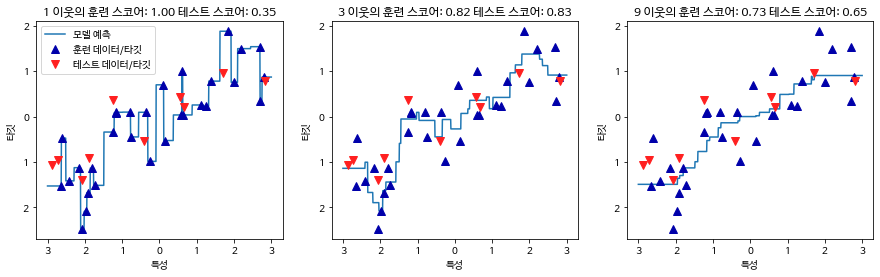

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3 과 3 사이에 1,000 개의 데이터 포인트를 만든다.
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
  # 1, 3, 9 이웃을 사용한 예측을 한다.
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(x_train,y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(x_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
  ax.plot(x_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

  ax.set_title(
      "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
          n_neighbors, reg.score(x_train, y_train),
          reg.score(x_test, y_test)))
  ax.set_xlabel("특성")
  ax.set_ylabel("타깃")

axes[0].legend(["모델 예측", "훈련 데이터/타깃",
                "테스트 데이터/타깃"], loc="best")